In [1]:
import datetime
start_time = datetime.datetime.now()
start_time

datetime.datetime(2022, 4, 24, 10, 5, 55, 984784)

In [2]:
# Also runs installation of dependencies
from lib.util import *

from lib.feature_eng import *

In [3]:
from sklearn.cluster import KMeans

In [4]:
years = [2016, 2017, 2018, 2019]
origin_df = []

for year in years:
    file_name = f'../dataset/TEDS-D-{year}-DS0001-bndl-data-tsv'
    if year == 2019:
        file_name += '_V1.zip'
    else:
        file_name += '.zip'
    origin_df.append(read_csv(file_name))

In [5]:
df = pd.concat(origin_df)

In [6]:
test_df = df[df['DISYR'] == 2019]
test_df = test_df[['STFIPS', 'REASON']]

In [7]:
test_df['STFIPS'].nunique()

49

In [8]:
test_df['count'] = 1

In [9]:
pivot = test_df.pivot_table(index=["STFIPS"], columns="REASON", values="count", aggfunc="sum", fill_value=0)

In [10]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(pivot)

In [11]:
labels = kmeans.predict(pivot)

In [12]:
len(labels)

49

In [13]:
pivot['label'] = labels
pivot = pivot.reset_index()

In [14]:
pivot['state'] = pivot['STFIPS'].apply(lambda x: US_STATE_TO_ABBREV[STATE_DICT[x]])
pivot = pivot[['state', 1, 2, 3, 4, 5, 6, 7, 'label']]

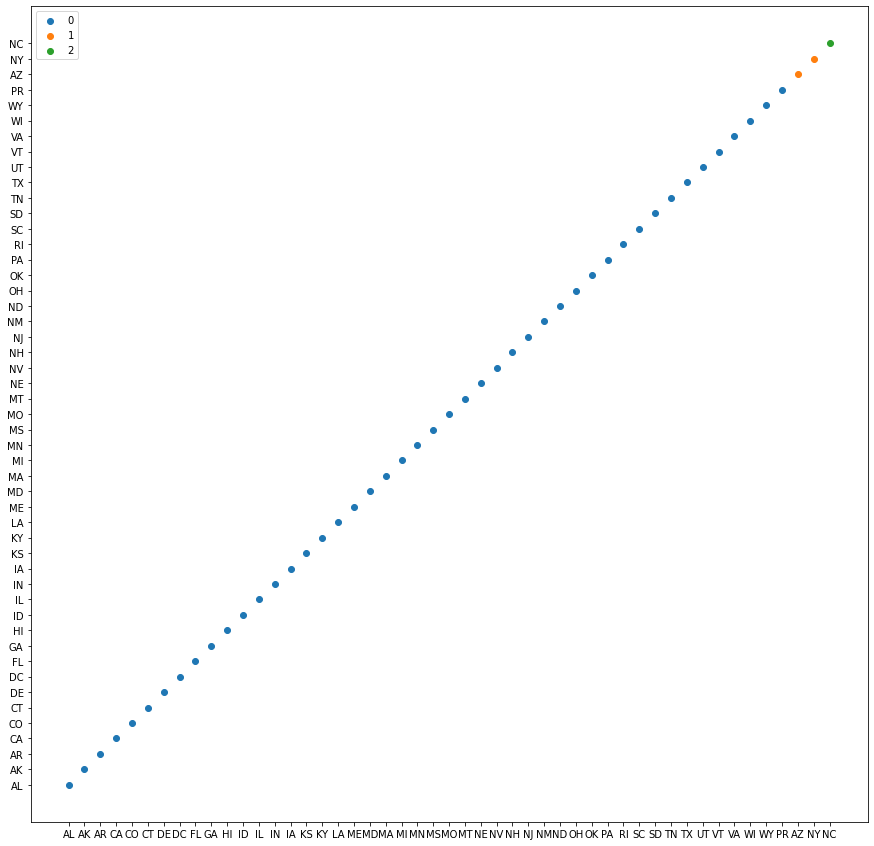

In [15]:
import matplotlib.pyplot as plt

u_labels = np.unique(labels)
plt.figure(figsize=(15,15))

for i in u_labels:
    sub = pivot[pivot['label'] == i]
    plt.scatter(sub['state'], sub['state'], label = i)
    plt.legend()
plt.show()

In [16]:
end_time = datetime.datetime.now()
end_time

datetime.datetime(2022, 4, 24, 10, 6, 48, 156109)

In [17]:
# How long it took to run our entire notebook
end_time - start_time

datetime.timedelta(seconds=52, microseconds=171325)